In [1]:
import math
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from functions.functions import EmissionProfile, CO2IPCCAbsoluteMetricsPulse, AbsoluteMetrics, RelativeMetrics
from climate_models.fair_emulator import BackgroundSpeciesQuantities, CO2IPCCClimateModel, FaIRClimateModel, GWPStarEquivalentEmissionsFunction, GWPStarClimateModel, LWEClimateModel

C:\Users\t.planes\AppData\Local\miniconda3\envs\AeroMetrics\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Parameters

In [2]:
unit_value_o3 = 1
sensitivity_erf_o3 = 34.4e-12 * (14/46)
ratio_erf_rf_o3 = 1.18
efficacy_rf_o3 = 1
efficacy_erf_o3 = 1

unit_value_ch4 = 1
sensitivity_erf_ch4 = -0.82e-9
ratio_erf_rf_ch4 = 1.37
efficacy_rf_ch4 = 1
efficacy_erf_ch4 = 1

start_year = 1940
end_year = 2018
tcre = 0.00045

In [3]:
klower_data_df = read_csv("climate_data/historical_data_from_klower.csv", delimiter=";")
klower_data = klower_data_df.values
klower_data_years = klower_data[:, 0]
klower_data_co2 = klower_data[:, 1]
klower_data_distance = klower_data[:, 2]
aeromaps_data_co2 = klower_data[:, 3]

emission_index_nox = 0.01514
emission_profile = klower_data_co2 / 3.15 * emission_index_nox * 1e9 # [MtNOx to kgNOx]

## Metrics calculation

In [4]:
radiative_forcing_o3, effective_radiative_forcing_o3, temperature_o3 = LWEClimateModel(start_year, end_year, emission_profile, "Aviation NOx ST O3 increase", sensitivity_erf_o3, ratio_erf_rf_o3, efficacy_erf_o3, tcre)
radiative_forcing_ch4, effective_radiative_forcing_ch4, temperature_ch4 = LWEClimateModel(start_year, end_year, emission_profile, "Aviation NOx CH4 decrease and induced", sensitivity_erf_ch4, ratio_erf_rf_ch4, efficacy_erf_ch4, tcre)

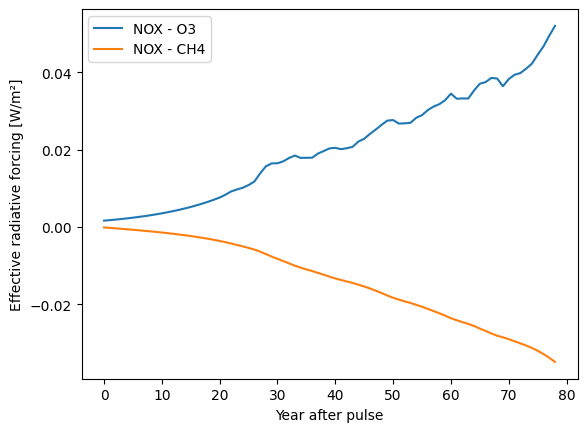

In [5]:
plt.plot(effective_radiative_forcing_o3, label='NOX - O3')
plt.plot(effective_radiative_forcing_ch4, label='NOX - CH4')
plt.xlabel('Year after pulse')
plt.ylabel('Effective radiative forcing [W/m²]')
plt.legend()

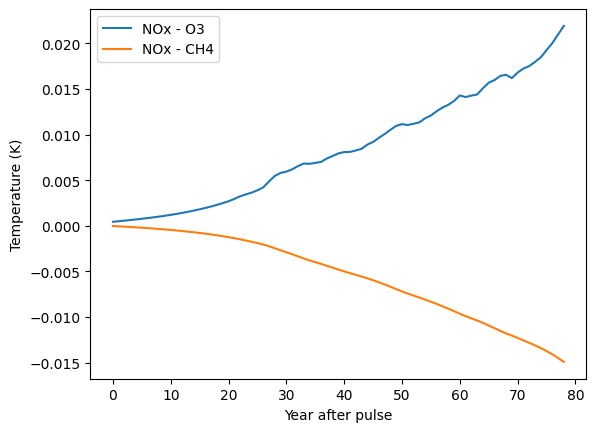

In [6]:
plt.plot(temperature_o3, label='NOx - O3')
plt.plot(temperature_ch4, label='NOx - CH4')
plt.xlabel('Year after pulse')
plt.ylabel('Temperature (K)')
plt.legend()

In [7]:
print(1000*effective_radiative_forcing_o3[65], 1000*effective_radiative_forcing_o3[71], 1000*effective_radiative_forcing_o3[78])
print(1000*effective_radiative_forcing_ch4[65], 1000*effective_radiative_forcing_ch4[71], 1000*effective_radiative_forcing_ch4[78])

37.053869463188406 39.38419649669566 52.01621394141836
-26.29018709530087 -29.590435588293282 -34.92946082869459
